In [1]:
from textstat.textstat import textstat
import csv
import pandas
import matplotlib
#matplotlib.style.use('ggplot')
%matplotlib inline
import ast
pandas.options.display.max_colwidth = 100000

In [2]:
def flatten(l):
    return [item for sublist in l for item in sublist]

## survey size = 5 stories + 1 Gold
## 120 stories total = 24 surveys (24 rows)
## x 2 = 48 rows

In [3]:
GROUP_A = pandas.read_csv('data/FOR_SURVEY/all_cleaned_new_flesch.csv')
GROUP_B = pandas.read_csv('data/FOR_SURVEY/all_redacted_new_flesch.csv')

In [4]:
len(GROUP_A)
len(GROUP_B)

120

In [5]:
org_to_pretty = {'cnn':'CNN', 'fox':'Fox News', 'nyt':'The New York Times','wsj':'The Wall Street Journal', 'ap': 'the Associated Press'}
candidate_to_pretty = {'trump':'Donald Trump', 'clinton':'Hillary Clinton', 'sanders':'Bernie Sanders','cruz':'Ted Cruz'}

GROUP_A['pretty_org'] = GROUP_A['org'].apply(lambda row: org_to_pretty[row])
GROUP_B['pretty_org'] = GROUP_B['org'].apply(lambda row: org_to_pretty[row])

GROUP_A['pretty_name'] = GROUP_A['candidate'].apply(lambda row: candidate_to_pretty[row])
GROUP_B['pretty_name'] = GROUP_B['candidate'].apply(lambda row: candidate_to_pretty[row])

 ## Sample Group A: No redaction.

In [6]:
test = GROUP_A.copy()
len(test)
samples = []
for i in xrange(24):
    t = test.sample(5)
    samples.append(t)
    test = test.drop(t.index)


sanders    2
clinton    2
trump      1

Immigration         3
Campaign Finance    2



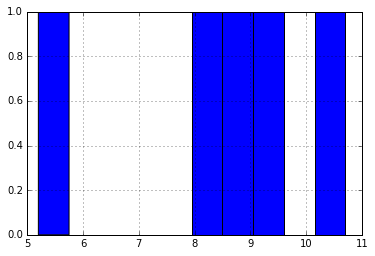


##################################################

sanders    2
trump      2
clinton    1

Campaign Finance    5



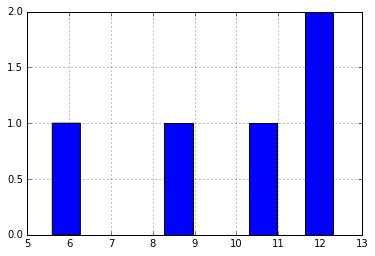


##################################################

cruz       2
trump      2
sanders    1

Campaign Finance    3
Immigration         2



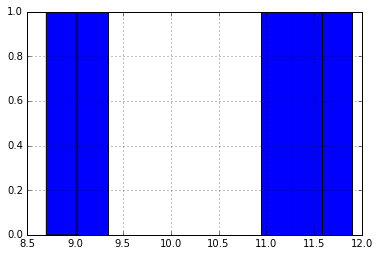


##################################################

clinton    4
trump      1

Foreign Policy/National Security    3
Abortion                            1
Campaign Finance                    1



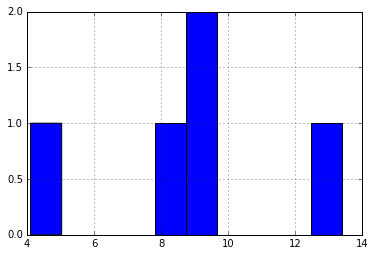


##################################################

trump      2
clinton    1
cruz       1
sanders    1

Campaign Finance                    2
Immigration                         1
Abortion                            1
Foreign Policy/National Security    1



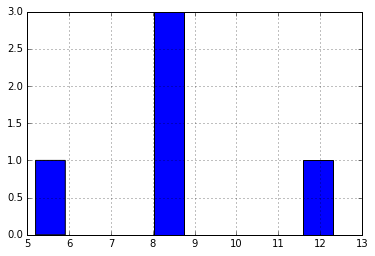


##################################################

sanders    3
cruz       1
clinton    1

Campaign Finance                    3
Foreign Policy/National Security    1
Immigration                         1



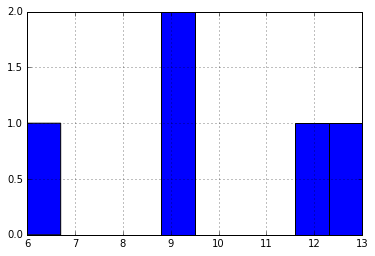


##################################################

cruz     4
trump    1

Immigration         3
Campaign Finance    2



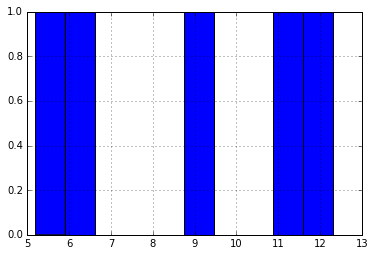


##################################################

cruz       3
trump      1
sanders    1

Abortion                            2
Immigration                         1
Foreign Policy/National Security    1
Campaign Finance                    1



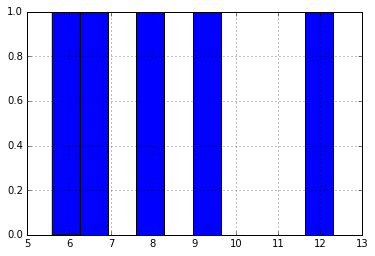


##################################################

cruz       3
sanders    1
clinton    1

Campaign Finance                    3
Foreign Policy/National Security    1
Immigration                         1



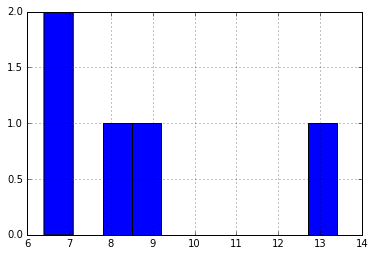


##################################################

cruz       2
clinton    2
trump      1

Campaign Finance    2
Immigration         2
Abortion            1



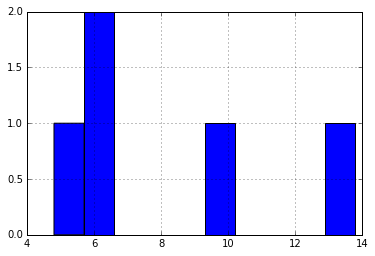


##################################################

cruz       3
trump      1
clinton    1

Campaign Finance                    3
Foreign Policy/National Security    2



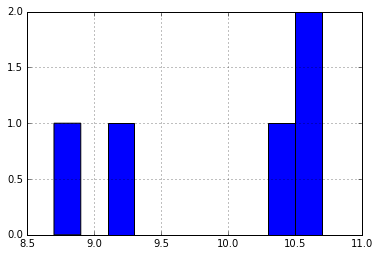


##################################################

clinton    4
trump      1

Campaign Finance    4
Abortion            1



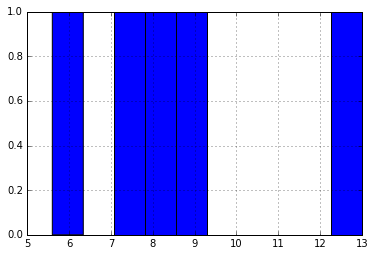


##################################################

sanders    3
trump      1
clinton    1

Foreign Policy/National Security    2
Campaign Finance                    2
Immigration                         1



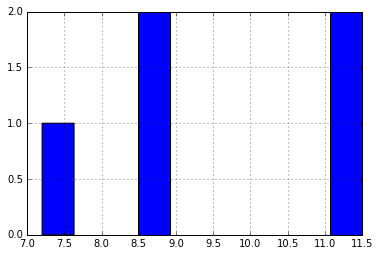


##################################################

sanders    2
trump      2
cruz       1

Campaign Finance                    3
Foreign Policy/National Security    1
Immigration                         1



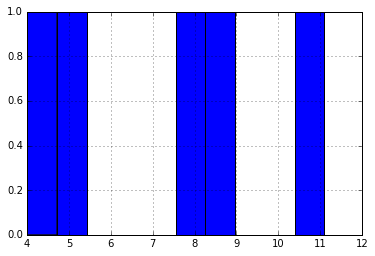


##################################################

cruz     4
trump    1

Foreign Policy/National Security    2
Immigration                         1
Abortion                            1
Campaign Finance                    1



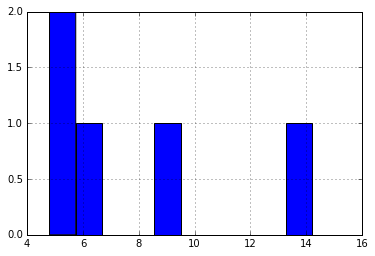


##################################################

cruz       2
trump      2
sanders    1

Foreign Policy/National Security    3
Immigration                         2



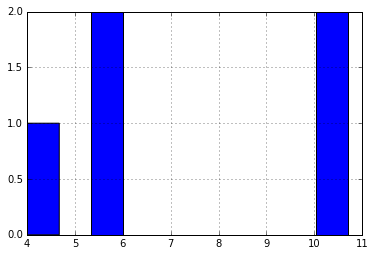


##################################################

trump      3
sanders    1
clinton    1

Campaign Finance                    3
Foreign Policy/National Security    1
Immigration                         1



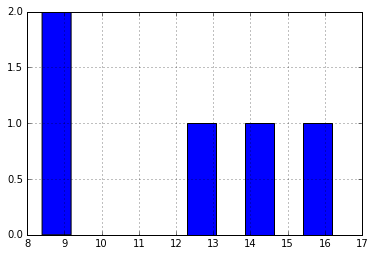


##################################################

cruz       2
trump      1
clinton    1
sanders    1

Campaign Finance    3
Immigration         2



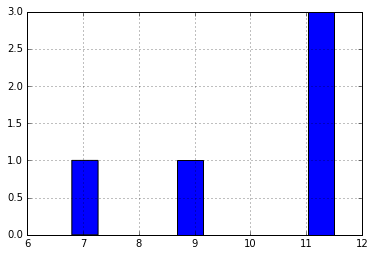


##################################################

trump      2
clinton    2
sanders    1

Campaign Finance    3
Immigration         2



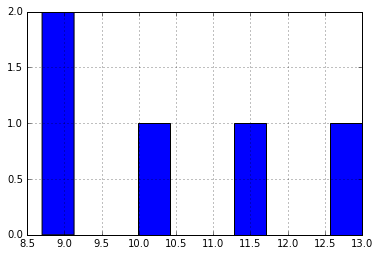


##################################################

sanders    2
clinton    2
cruz       1

Immigration         3
Campaign Finance    2



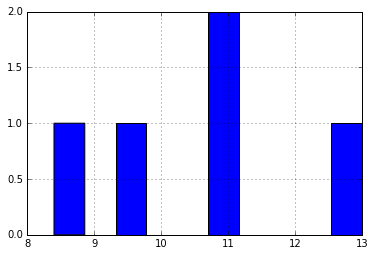


##################################################

sanders    2
trump      2
clinton    1

Campaign Finance    2
Abortion            2
Immigration         1



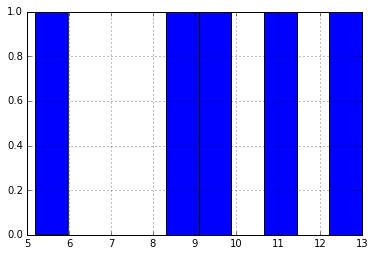


##################################################

sanders    2
clinton    2
trump      1

Campaign Finance                    2
Immigration                         1
Abortion                            1
Foreign Policy/National Security    1



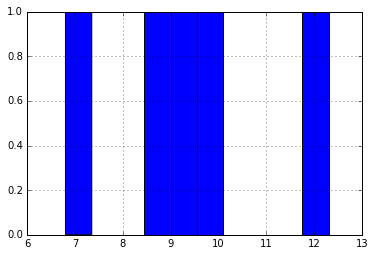


##################################################

sanders    3
trump      1
clinton    1

Campaign Finance                    4
Foreign Policy/National Security    1



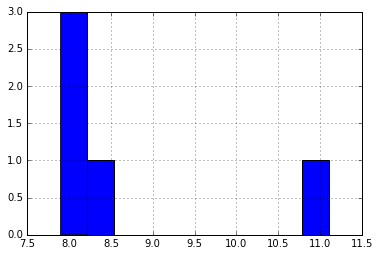


##################################################

clinton    2
trump      1
cruz       1
sanders    1

Foreign Policy/National Security    3
Immigration                         2



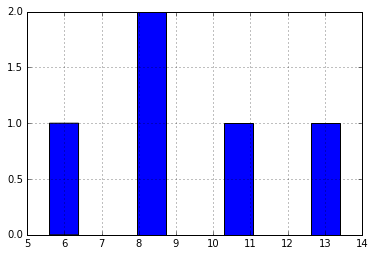


##################################################


In [7]:
for s in samples:
    print 
    print s.candidate.value_counts().to_string()
    print
    print s.top_topic.value_counts().to_string()
    print 
    s.flesch_new.hist()
    matplotlib.pyplot.show()
    print
    print '#' * 50 

## Save little dataframes

In [8]:
for i in xrange(len(samples)):
    samples[i].to_csv('../SURVEY/DATA/GROUP_A/sample' + str(i) + '.csv') 

## Save as one big CSV for group A

In [9]:
import csv 
with open('../SURVEY/DATA/GROUP_A.csv', "wb") as f:
    c = csv.writer(f) 
    c.writerow(['index_1','title_1','url_1','candidate_1','org_1','top_topic_1','body_1','gunning_fog_1','flesch_1','readability_1',
                'index_2','title_2','url_2','candidate_2','org_2','top_topic_2','body_2','gunning_fog_2','flesch_2','readability_2',
                'index_3','title_3','url_3','candidate_3','org_3','top_topic_3','body_3','gunning_fog_3','flesch_3','readability_3',
                'index_4','title_4','url_4','candidate_4','org_4','top_topic_4','body_4','gunning_fog_4','flesch_4','readability_4',
                'index_5','title_5','url_5','candidate_5','org_5','top_topic_5','body_5','gunning_fog_5','flesch_5','readability_5'])
    for sample in samples:
        x = [list(row[1][['Unnamed: 0','title', u'url', u'candidate', u'pretty_org',\
       u'top_topic', u'body', u'gunning_fog_new',\
       u'flesch_new', u'readability']]) for row in sample.iterrows()]
        #for row in t.iterrows():
        #c.writerow([])
        c.writerow(flatten(x))
        


 # Construct GROUP B big CSV using GROUP A

In [10]:
new_samples = []
for s in samples:
    new_samples.append(GROUP_B[GROUP_B['Unnamed: 0'].isin(list(s['Unnamed: 0']))])
len(new_samples) 

24

## Save little dataframes

In [11]:
for i in xrange(len(new_samples)):
    new_samples[i].to_csv('../SURVEY/DATA/GROUP_B/sample' + str(i) + '.csv')

## Save as one big CSV for group B

In [12]:
import csv 
with open('../SURVEY/DATA/GROUP_B.csv', "wb") as f:
    c = csv.writer(f) 
    c.writerow(['index_1','title_1','url_1','candidate_1','org_1','top_topic_1','body_1','gunning_fog_1','flesch_1','readability_1',
                'index_2','title_2','url_2','candidate_2','org_2','top_topic_2','body_2','gunning_fog_2','flesch_2','readability_2',
                'index_3','title_3','url_3','candidate_3','org_3','top_topic_3','body_3','gunning_fog_3','flesch_3','readability_3',
                'index_4','title_4','url_4','candidate_4','org_4','top_topic_4','body_4','gunning_fog_4','flesch_4','readability_4',
                'index_5','title_5','url_5','candidate_5','org_5','top_topic_5','body_5','gunning_fog_5','flesch_5','readability_5'])
    for sample in new_samples:
        x = [list(row[1][['Unnamed: 0','title', u'url', u'candidate', u'pretty_org',\
       u'top_topic', u'body', u'gunning_fog_new',\
       u'flesch_new', u'readability']]) for row in sample.iterrows()]
        #for row in t.iterrows():
        #c.writerow([])
        c.writerow(flatten(x)) 